In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

#Import Dataframe

In [43]:
maindf = yf.download("BTC-USD", start="2014-01-01", end="2023-11-14")
# ethe = yf.download("ETH-USD", start="2014-01-01", end="2023-11-14")


[*********************100%%**********************]  1 of 1 completed


In [44]:
maindf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [45]:
maindf.shape


(3345, 6)

In [46]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3345 entries, 2014-09-17 to 2023-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3345 non-null   float64
 1   High       3345 non-null   float64
 2   Low        3345 non-null   float64
 3   Close      3345 non-null   float64
 4   Adj Close  3345 non-null   float64
 5   Volume     3345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.9 KB


In [47]:
maindf.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3.345000e+03
mean,14199.727966,14535.048435,13837.088627,14209.152119,14209.152119,1.647072e+10
std,15995.468044,16385.340329,15555.690110,15995.270550,15995.270550,1.919306e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,891.924011,904.614014,858.304016,895.026001,895.026001,1.458210e+08
50%,8141.430176,8274.120117,7917.500000,8145.857422,8145.857422,1.087647e+10
75%,22954.021484,23388.322266,22603.416016,22961.279297,22961.279297,2.696772e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [48]:
def plot_crypto_price_over_time(crypto_data, crypto_name):
    plt.figure(figsize=(16, 8))
    plt.title(f'{crypto_name} Price Over Time', fontsize=12)
    plt.plot(crypto_data.index, crypto_data['Close'], label='Closing Price', color='blue', linewidth=2)
    plt.xlabel('Data', fontsize=18)
    plt.ylabel('USD', fontsize=18)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

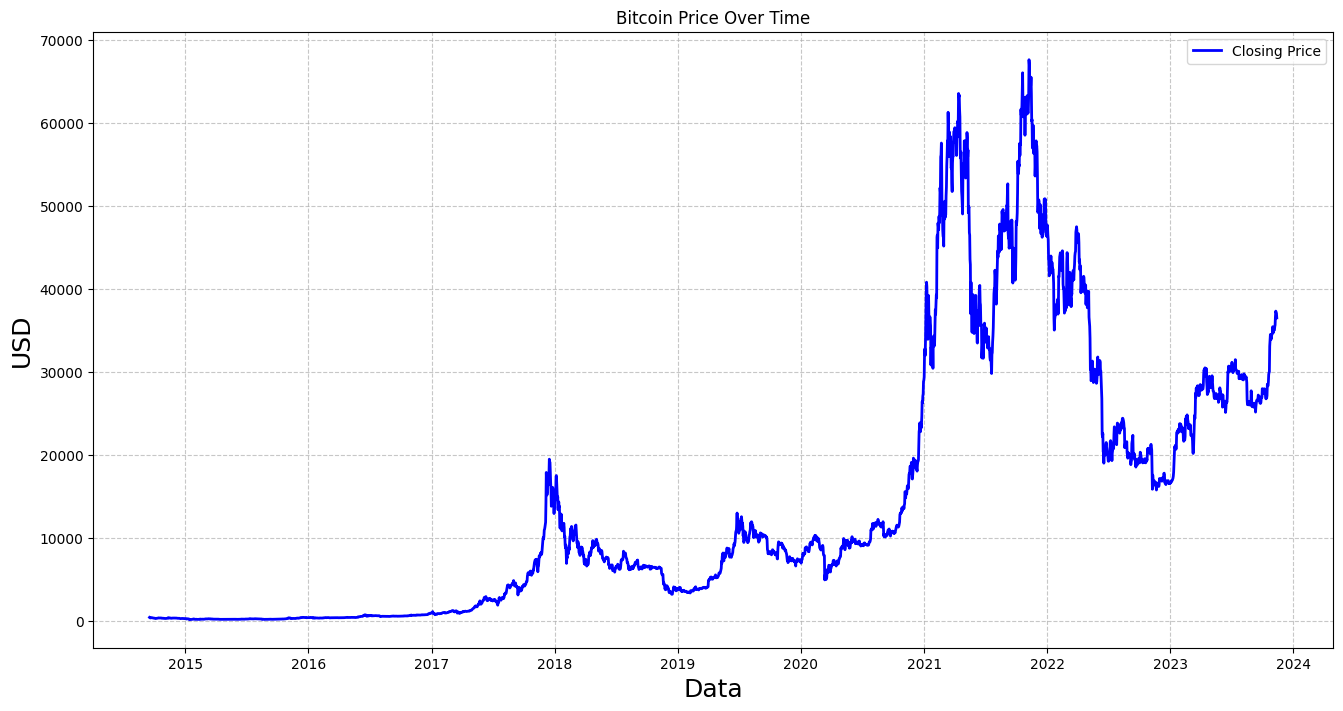

In [49]:
plot_crypto_price_over_time(maindf, 'Bitcoin')

In [50]:
data = maindf.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len


2676

In [51]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.54845893],
       [0.54721938],
       [0.53902567]])

In [52]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]



In [53]:
len(X_train)


2616

In [54]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
X_train.shape


(2616, 60)

In [56]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2616, 60, 1)

In [57]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [58]:
# Convert the data to a numpy array
X_test = np.array(X_test)


# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [59]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [60]:
model_1.compile(optimizer='adam', loss='mse')


In [61]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2616/2616 [==============================] - 92s 34ms/step - loss: 0.0018
Epoch 2/10
2616/2616 [==============================] - 82s 31ms/step - loss: 6.9085e-04
Epoch 3/10
2616/2616 [==============================] - 83s 32ms/step - loss: 5.0295e-04
Epoch 4/10
2616/2616 [==============================] - 84s 32ms/step - loss: 4.3497e-04
Epoch 5/10
2616/2616 [==============================] - 83s 32ms/step - loss: 3.7730e-04
Epoch 6/10
2616/2616 [==============================] - 82s 31ms/step - loss: 3.3734e-04
Epoch 7/10
2616/2616 [==============================] - 82s 32ms/step - loss: 4.1390e-04
Epoch 8/10
2616/2616 [==============================] - 80s 31ms/step - loss: 3.5040e-04
Epoch 9/10
2616/2616 [==============================] - 81s 31ms/step - loss: 3.1677e-04
Epoch 10/10
2616/2616 [==============================] - 81s 31ms/step - loss: 2.8368e-04


In [62]:
# Get the model_1 predicted price values
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

21/21 [==============================] - 3s 31ms/step


669

In [63]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

227.83838839452542

Text(0.5, 0, 'epochs')

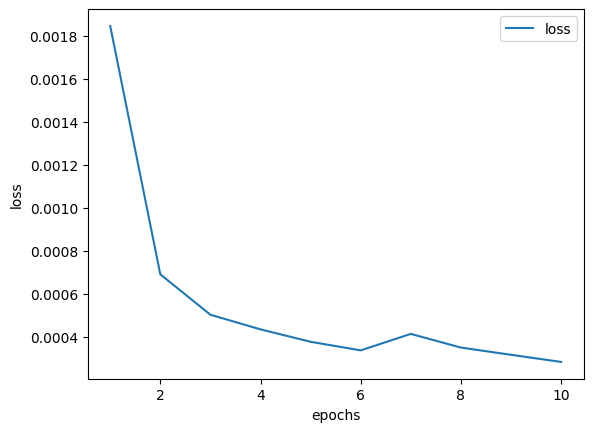

In [64]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [65]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
2616/2616 [==============================] - 86s 31ms/step - loss: 0.0019
Epoch 2/6
2616/2616 [==============================] - 80s 31ms/step - loss: 6.9857e-04
Epoch 3/6
2616/2616 [==============================] - 83s 32ms/step - loss: 4.8014e-04
Epoch 4/6
2616/2616 [==============================] - 80s 31ms/step - loss: 4.2455e-04
Epoch 5/6
2616/2616 [==============================] - 82s 31ms/step - loss: 3.6912e-04
Epoch 6/6
2616/2616 [==============================] - 80s 31ms/step - loss: 3.2178e-04


In [66]:
# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

21/21 [==============================] - 2s 31ms/step


669

In [67]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2


145.06984392516816

<ipython-input-68-8f41bf5e5744>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-68-8f41bf5e5744>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


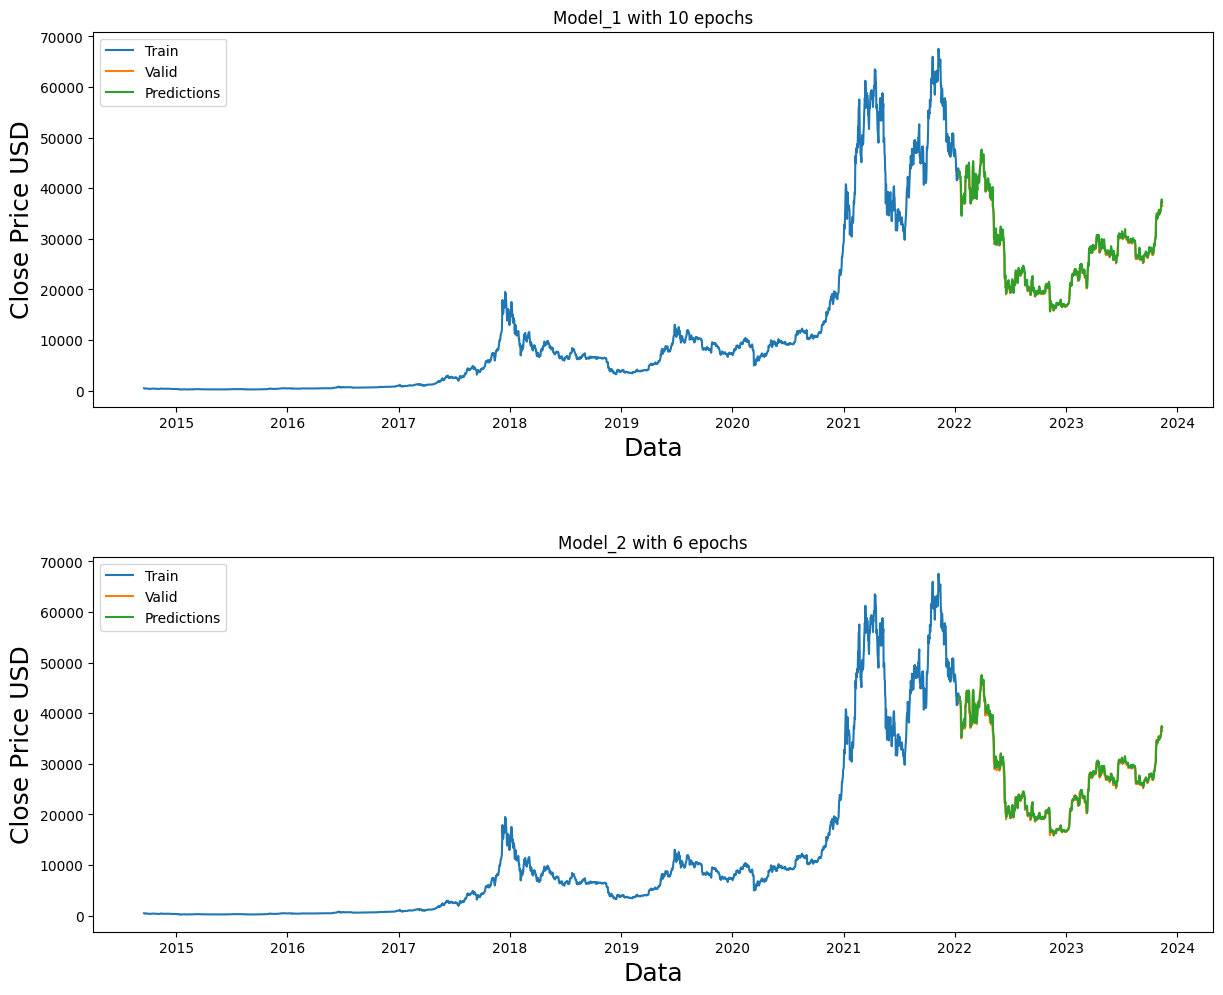

In [68]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [69]:
#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 407ms/step
[[36163.418]]


In [76]:
from tensorflow.keras.models import load_model

# Load the combined model
combined_model = load_model('combined_model.h5')

# Explicitly compile the model
combined_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
